Reference:<br>
spirograph basics:$\;\;\;\;\;\;\;\;$     http://www.mathematische-basteleien.de/spirographs.htm<br>
spirograph 3D:$\;\;\;\;\;\;\;\;\;\;\;\;$     https://matheminutes.blogspot.com/2012/01/if-spirograph-were-3d.html<br>
ipywidgets save button:$\;\;$     https://qiita.com/hyt-sasaki/items/2a940cd7387c408988be<br>
GIF animation:$\;\;\;\;\;\;\;\;\;\;\;\;$     https://qiita.com/hoto17296/items/a72e29c5c3b0e49d42fd<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display
import ipywidgets as widgets
from ipywidgets import interact
import re
import random
from io import BytesIO
from mpl_toolkits.mplot3d import axes3d
from PIL import Image

%matplotlib inline

In [2]:
# preparing variables in radians

x = np.arange(0, 18000, 0.2)
theta = x * (np.pi / 180.0)

print(len(theta))
theta

90000


array([0.00000000e+00, 3.49065850e-03, 6.98131701e-03, ...,
       3.14148793e+02, 3.14152284e+02, 3.14155775e+02])

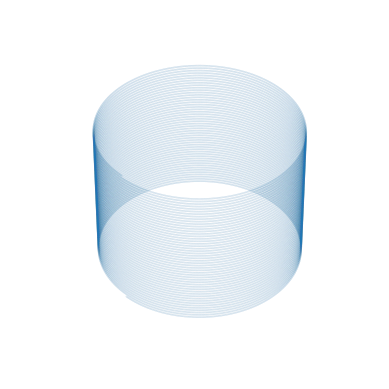

In [3]:
# example of cylinder for 3D drawing test: actually a spiral

R, r, a = 4.0, 1.9, 1.0

spg_xi = R * np.cos(theta)
spg_yi = R * np.sin(theta)
spg_zi = theta

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.1, alpha = 0.1)
ax.view_init(elev = 40, azim = 45, roll = 0)
plt.axis('off')
plt.show()

## Example of spirograph 3D formula
https://matheminutes.blogspot.com/2012/01/if-spirograph-were-3d.html

<img src="写真フォルダ/spirograph3d2.png" align="left" width="300px">

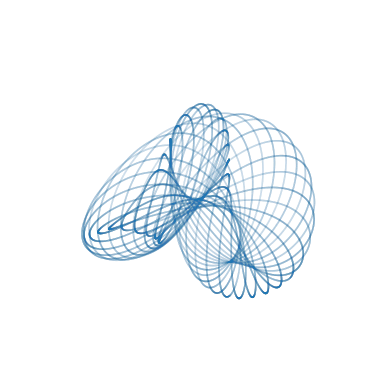

In [4]:
# Drawing of this formula using the same parameters: R, r, a = 4.0, 1.9, 1.0

spg_xi = (R - r) * np.cos(theta) + a * np.cos(((R - r) / r) * theta)
spg_yi = ((R - r) * np.sin(theta) - a * np.sin(((R - r) / r) * theta)) * np.cos(a * theta)
spg_zi = ((R - r) * np.sin(theta) - a * np.sin(((R - r) / r) * theta)) * np.sin(a * theta)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.1, alpha = 0.1)
plt.axis('off')
plt.show()

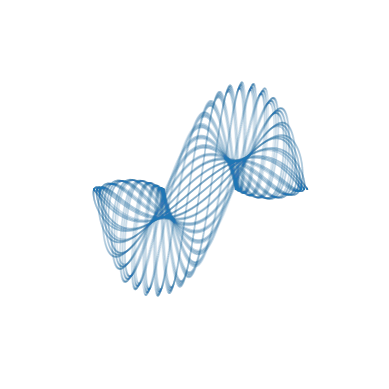

In [5]:
# Change the formula

spg_xi = (R - r) * np.cos(theta) + a * np.cos(((R - r) / r) * theta)
spg_yi = ((R - r) * np.sin(theta) - a * np.sin(((R - r) / r) * theta)) * np.sin(a * theta) * np.cos(a * theta)
spg_zi = theta

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.1, alpha = 0.1)
ax.view_init(elev = 90, azim = 90, roll = 0)
plt.axis('off')
plt.show()

## Determine the preferable parameters for the 2nd formula

In [6]:
# Determine the shape you like first changing parameters interactively
# Click the save button to finalize the parameters

button = widgets.Button(description = 'save parameters')
display(button)
output = widgets.Output()
display(output)

@widgets.interact(R=(3, 5, 0.1), r=(1.5, 2.5, 0.1), a=(0.5, 1.5, 0.1))

def draw_spirograph_3d(R = 4.0, r = 2.0, a = 1.0):
    spg_xi = (R - r) * np.cos(theta) + a * np.cos(((R - r) / r) * theta)
    spg_yi = ((R - r) * np.sin(theta) - a * np.sin(((R - r) / r) * theta)) * np.sin(a * theta) * np.cos(a * theta)
    spg_zi = theta
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(projection = '3d')
    plt.axis('off')
    image = ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.1, alpha = 0.2)
    ax.view_init(elev = 90, azim = 90, roll = 0)
    plt.show()

    @output.capture(clear_output = True)
    def save_params(btn):
        content = R, r, a
        print('R = ', R, ' r = ', r, ' a = ', a, ' parameters saved.')
    button.on_click(save_params)

Button(description='save parameters', style=ButtonStyle())

Output()

interactive(children=(FloatSlider(value=4.0, description='R', max=5.0, min=3.0), FloatSlider(value=2.0, descri…

In [7]:
# Check the finalized result

print(output)

Output(outputs=({'output_type': 'stream', 'text': 'R =  4.6  r =  1.7  a =  0.6  parameters saved.\n', 'name': 'stdout'},))


In [8]:
# Extract numbers only using regex

position_Rra   = re.findall(r'\d\.\d', str(output))
R = float(position_Rra[0])
r = float(position_Rra[1])
a = float(position_Rra[2])
print(R, r, a)

4.6 1.7 0.6


## Make 3D animation with angle

In [9]:
# Make color dictionary to add color to animation

color_num = [0,1,2,3,4,5,6,7]
color = ['blue', 'green', 'purple', 'skyblue', 'navy', 'gray', 'pink', 'yellow']
color_dict = dict(zip(color_num, color))
#color_dict[1]

In [10]:
# Definition to make animation
import matplotlib.cm as cm

def render_frame(angle):
    
    spg_xi = (R - r) * np.cos(theta) + a * np.cos(((R - r) / r) * theta)
    spg_yi = ((R - r) * np.sin(theta) - a * np.sin(((R - r) / r) * theta)) * np.sin(a * theta) * np.cos(a * theta)
    spg_zi = theta
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(projection = '3d')
    plt.axis('off')
    color = color_dict[random.randrange(0, 5, 1)]
    image = ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.2, c = 'teal', alpha = 0.5 / random.randrange(1, 10, 1))
    #image = ax.scatter(spg_xi, spg_yi, spg_zi, marker = '.', s = 0.2, c = color, alpha = 0.1)
    ax.view_init(elev = (angle / 2), azim = angle, roll = (angle / 2))
    plt.close()    
    
    buf = BytesIO()
    fig.savefig(buf, bbox_inches = 'tight', pad_inches = 0.0)
    
    return Image.open(buf)

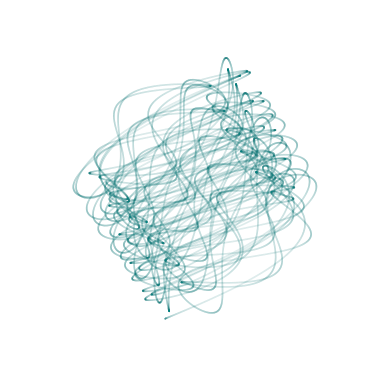

In [11]:
# Check the definition

render_frame(60)

In [12]:
# Make animation

images = [render_frame(angle) for angle in range(180, 540, 3)]
images[0].save('spirograph_3d_animation.gif', save_all = True, append_images = images[1:], duration = 50, loop = 1)